In [1]:
!pip install -U ucimlrepo 

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [3]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [4]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
y.head()

,class
0,1
1,2
2,1
3,1
4,2


In [6]:
X.shape

(1000, 20)

# 1.Data Preparation

In [7]:
data = statlog_german_credit_data.data.original
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
class          0
dtype: int64


In [9]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


In [10]:
column_names = ['Status_Checking_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                'Savings_Account', 'Employment', 'Installment_Rate', 'Personal_Status_Sex', 'Other_Debtors',
                'Residence_Since', 'Property', 'Age', 'Other_Installment_Plans', 'Housing',
                'Existing_Credits', 'Job', 'Liable_People', 'Telephone', 'Foreign_Worker', 'Credit_Risk']

data.columns = column_names

In [11]:
data.head()

,Status_Checking_Account,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [12]:
X = data.drop('Credit_Risk',axis=1)
y = data['Credit_Risk']

In [13]:
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [14]:
X.shape ,y.shape

((1000, 20), (1000,))

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [16]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) # 0:good 1:bad

In [17]:
y_encoded[:5]

array([0, 1, 0, 0, 1])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num' ,StandardScaler() ,numerical_features),
        ('cat' ,OneHotEncoder() ,categorical_features)
    ]
)

In [19]:
pipeline = Pipeline(steps=[('preprocessor' ,preprocessor)])

In [20]:
X_preprocessed = pipeline.fit_transform(X)

In [21]:
X_preprocessed.shape

(1000, 61)

In [22]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y_encoded)

In [23]:
X_resampled.shape ,y_resampled.shape

((1400, 61), (1400,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [25]:
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (1120, 61), Test set size: (280, 61)


# 2.EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

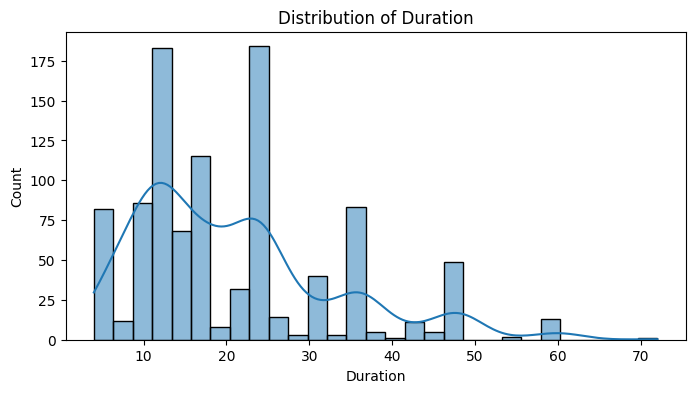

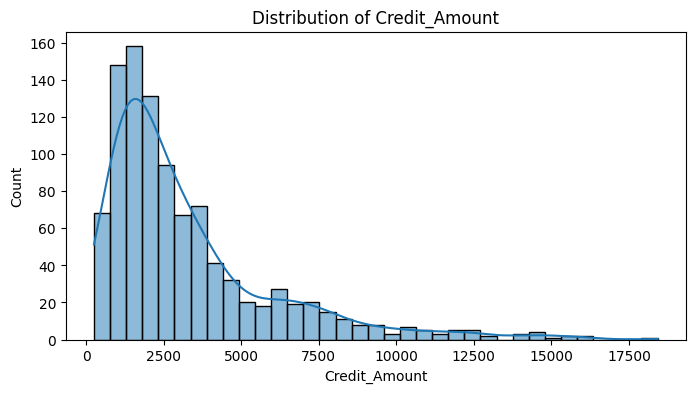

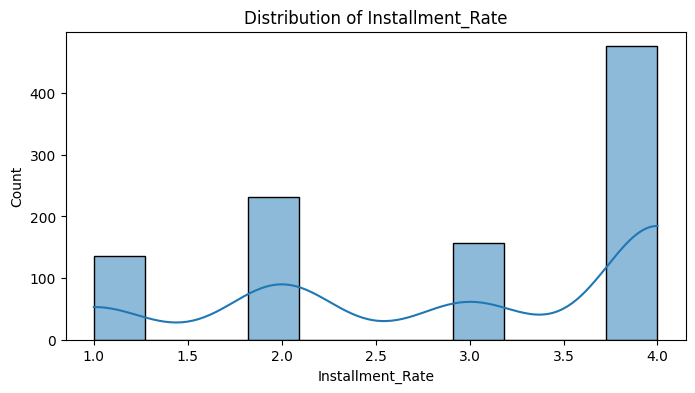

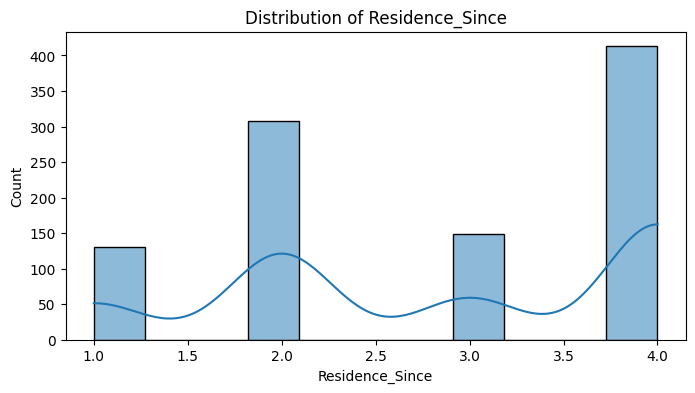

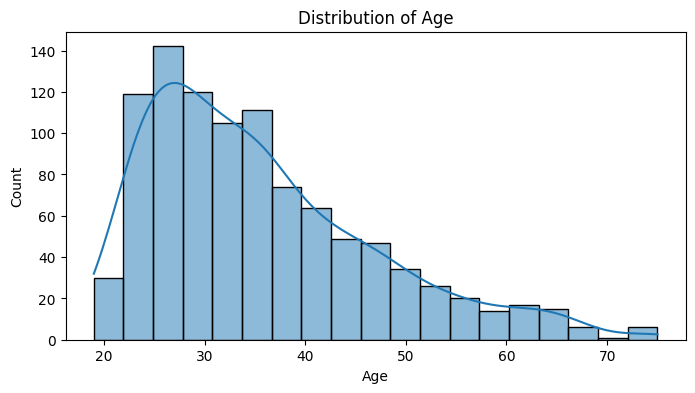

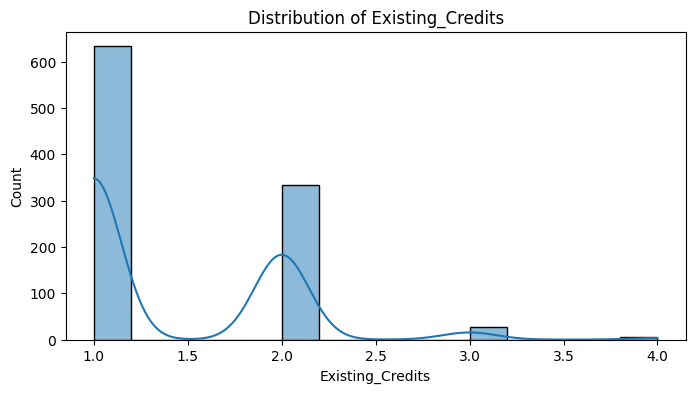

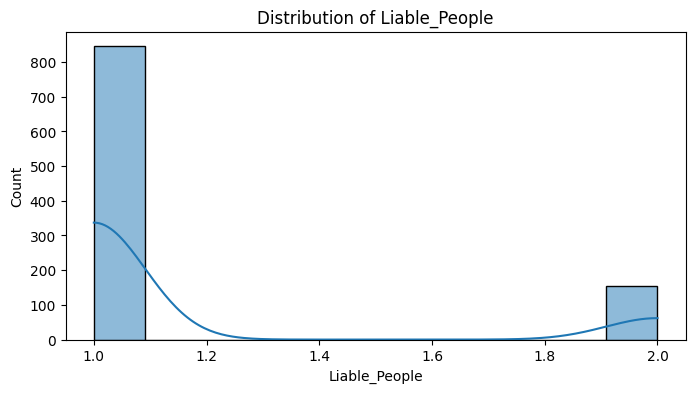

In [27]:
# 1. Visualize Distributions

# visualizing numerical feature distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature] ,kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

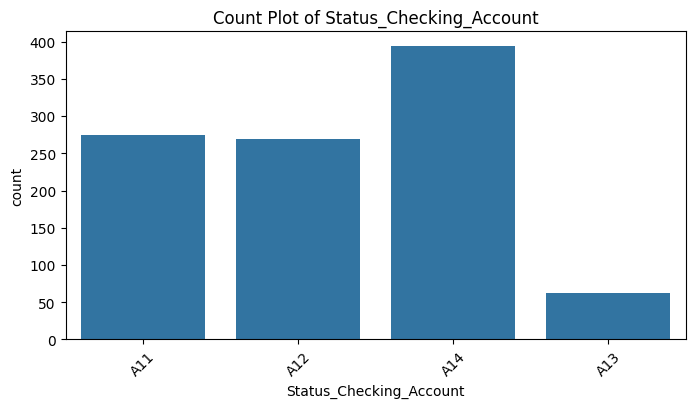

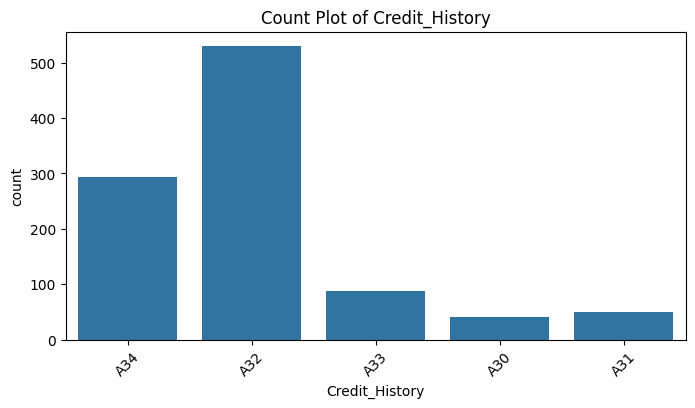

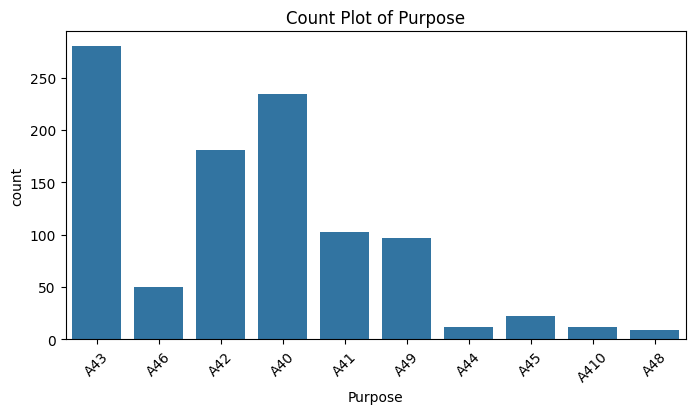

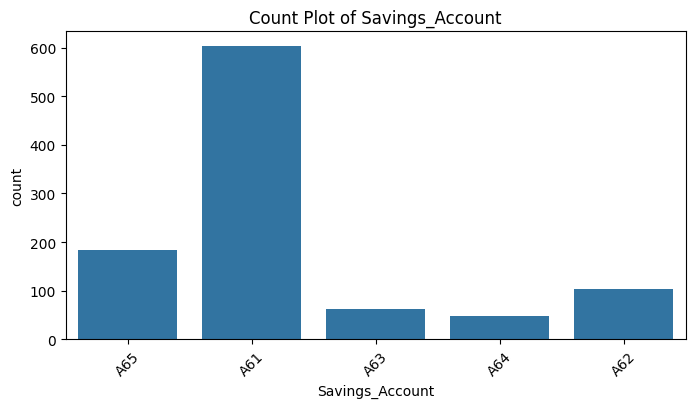

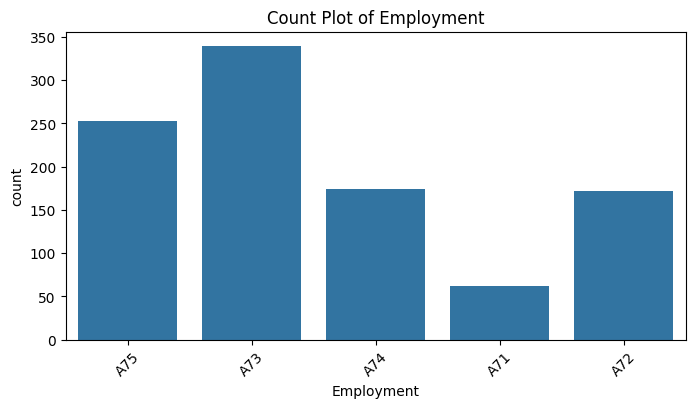

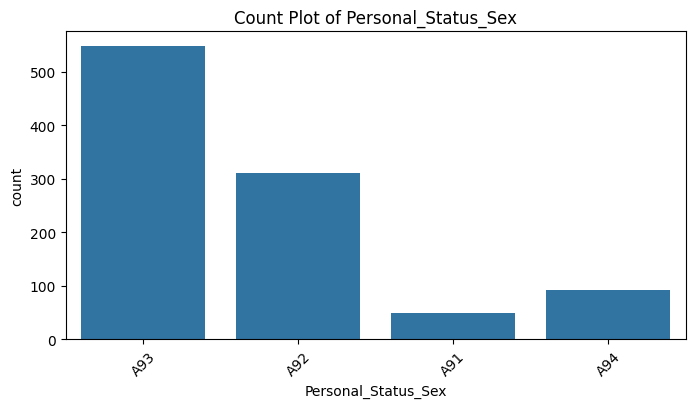

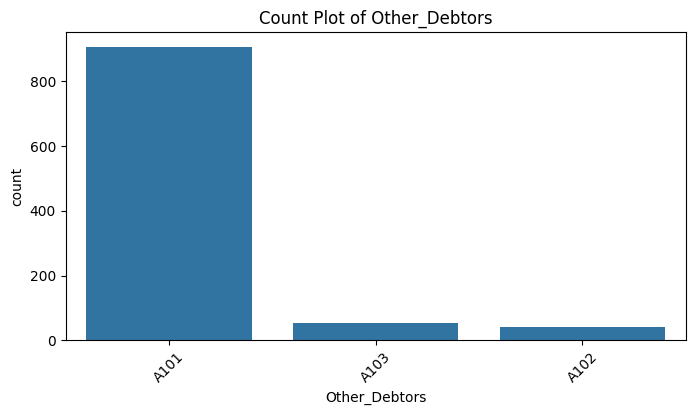

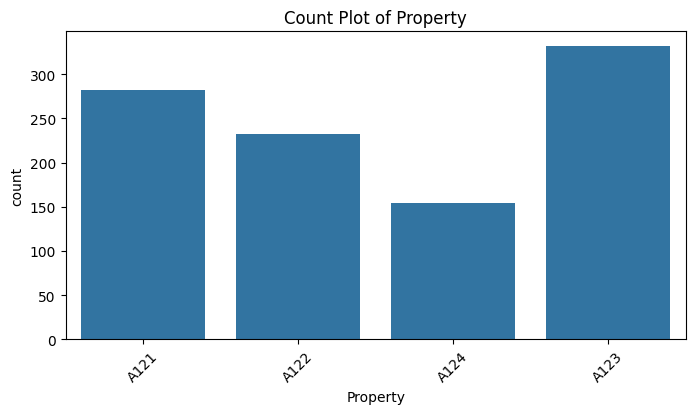

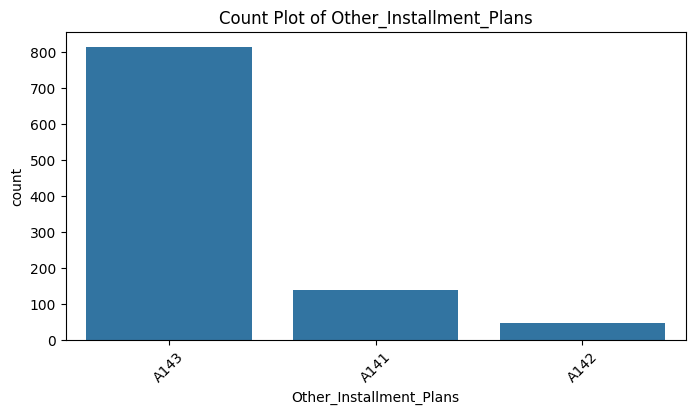

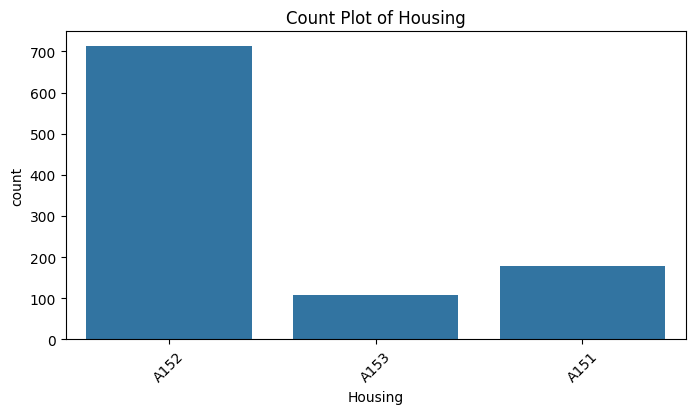

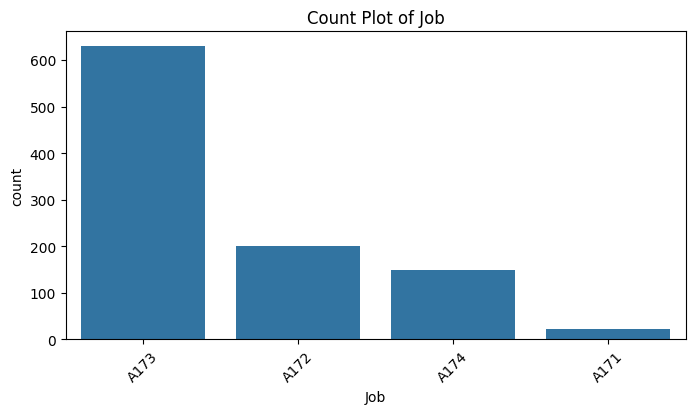

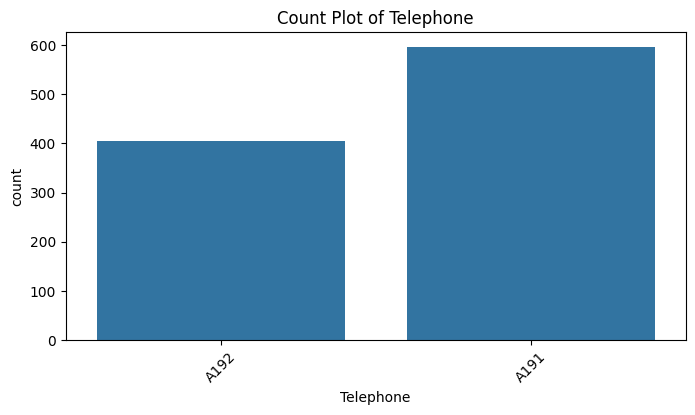

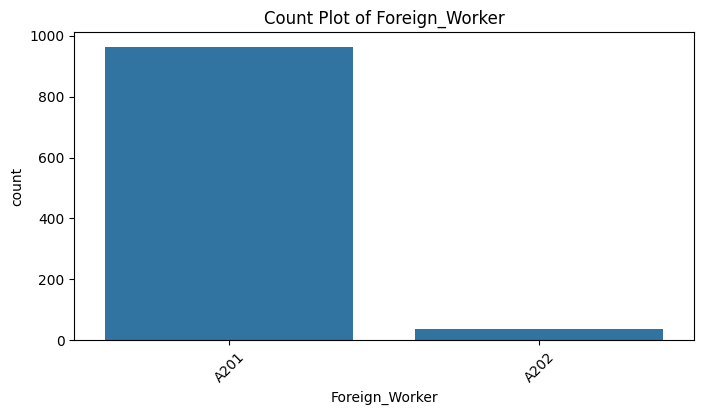

In [28]:
# Visualizing categorical feature distributions
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

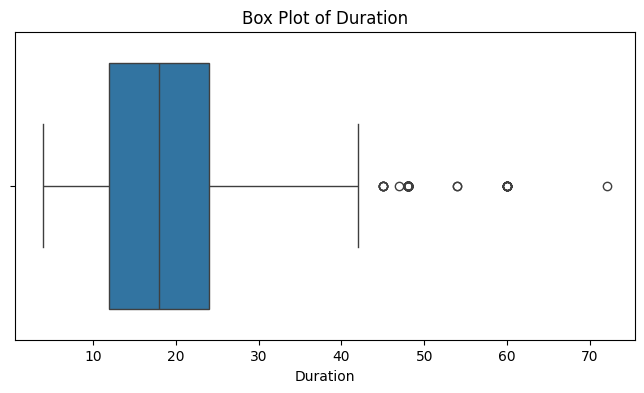

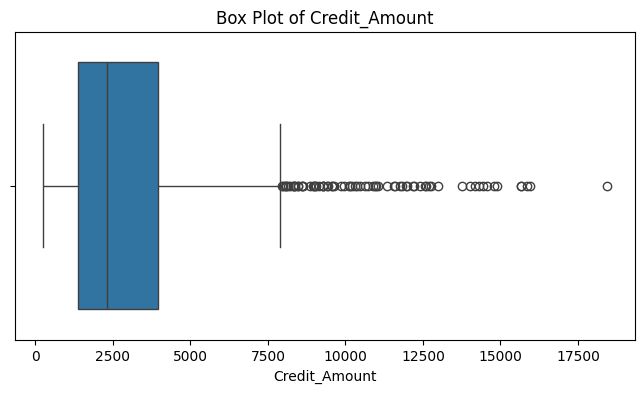

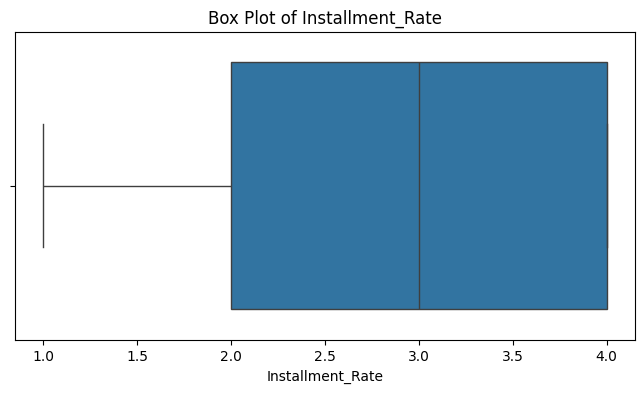

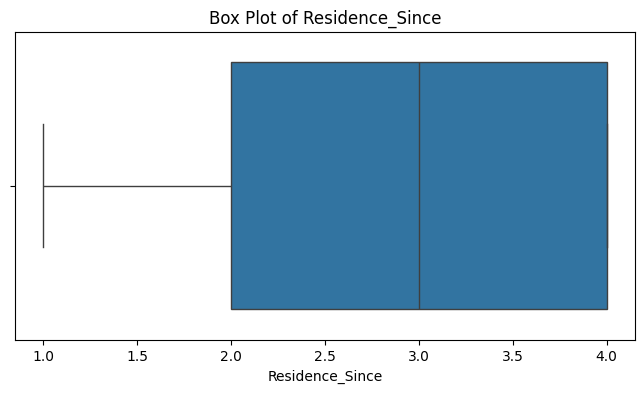

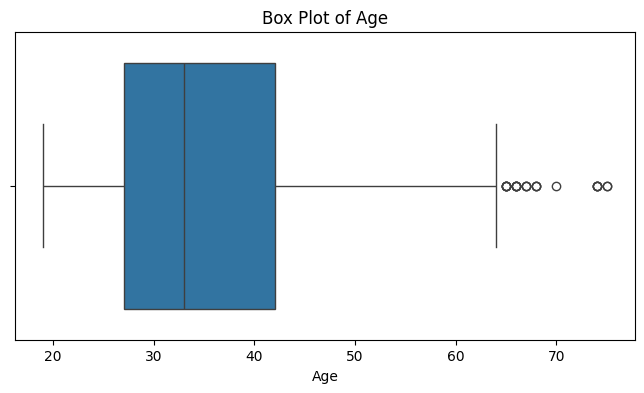

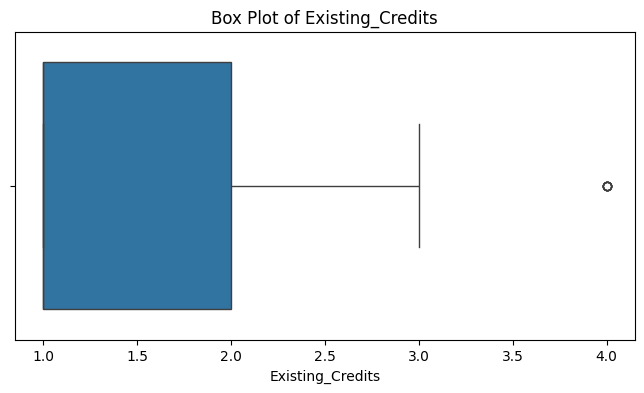

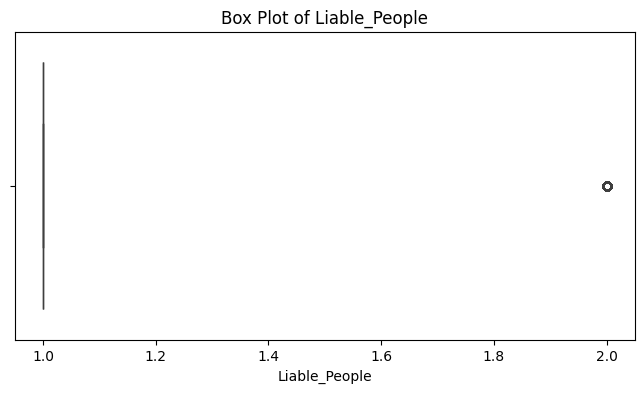

In [29]:
# Visualizing Box Plots to understand distributions and outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [30]:
# 2. Correlation Analysis

data_categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
data_numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

encoded_data = data.copy()

le = LabelEncoder()

In [31]:
for feature in data_categorical_features:
    encoded_data[feature] = le.fit_transform(encoded_data[feature])

In [32]:
data_numerical_features

['Duration',
 'Credit_Amount',
 'Installment_Rate',
 'Residence_Since',
 'Age',
 'Existing_Credits',
 'Liable_People',
 'Credit_Risk']

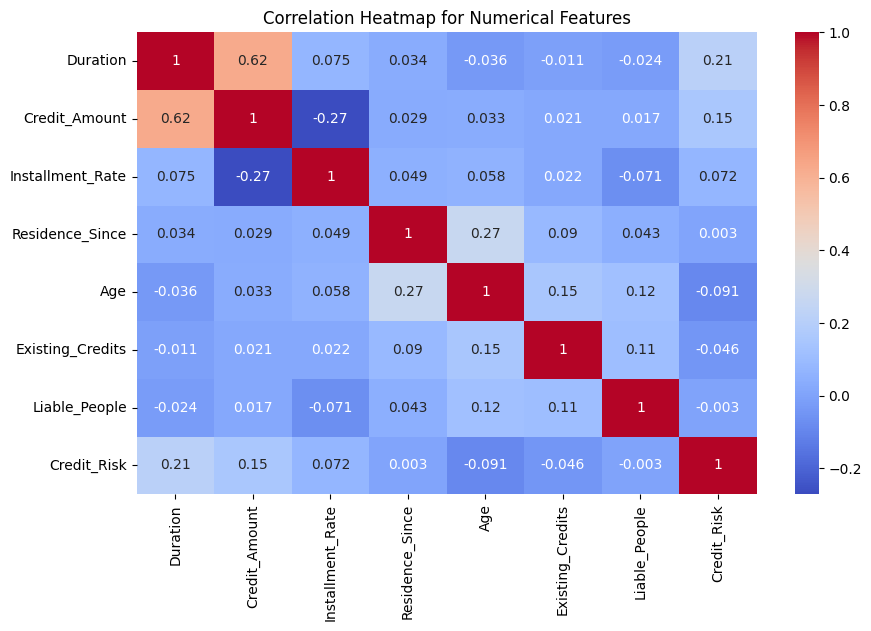

In [33]:
#Correlation heatmap for numerical features
plt.figure(figsize=(10 ,6))
corr_matrix = encoded_data[numerical_features + ['Credit_Risk']].corr()
sns.heatmap(corr_matrix ,annot=True ,cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [34]:
# 3. Feature Importance

X = encoded_data.drop('Credit_Risk', axis=1)
y = encoded_data['Credit_Risk']

In [35]:
import pandas as pd

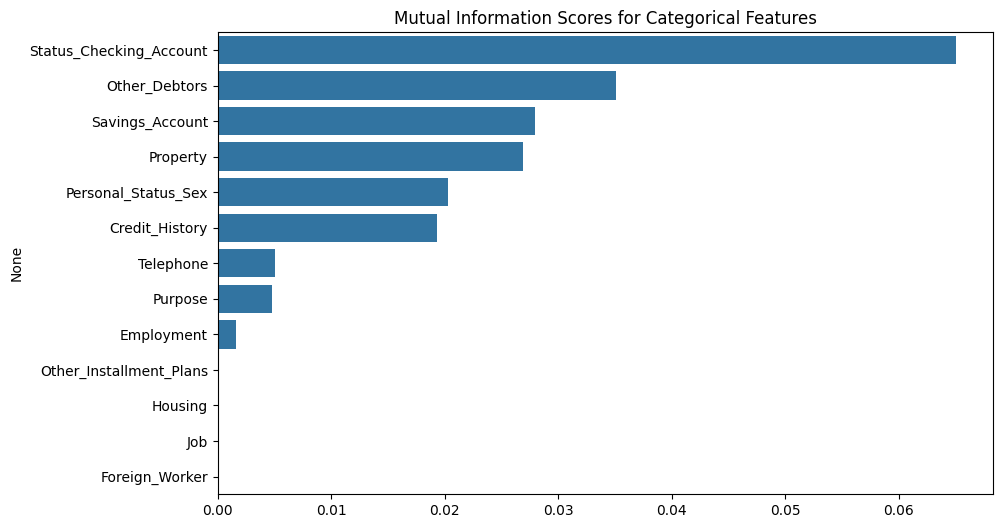

In [36]:
mutual_info = mutual_info_classif(X[data_categorical_features] ,y)
mutual_info_series = pd.Series(mutual_info ,index=data_categorical_features)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=mutual_info_series.values ,y=mutual_info_series.index)
plt.title('Mutual Information Scores for Categorical Features')
plt.show()

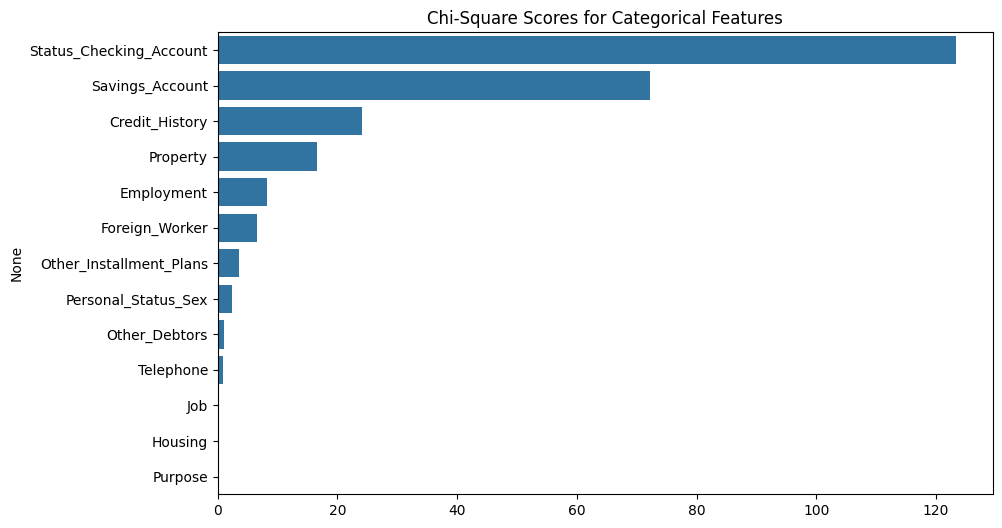

In [37]:
# Chi-Square Test for feature importance of categorical variables

chi2_selector = SelectKBest(chi2 ,k='all').fit(X[data_categorical_features] ,y)
chi2_scores = pd.Series(chi2_selector.scores_ ,index=data_categorical_features)
chi2_scores = chi2_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=chi2_scores.values, y=chi2_scores.index)
plt.title('Chi-Square Scores for Categorical Features')
plt.show()

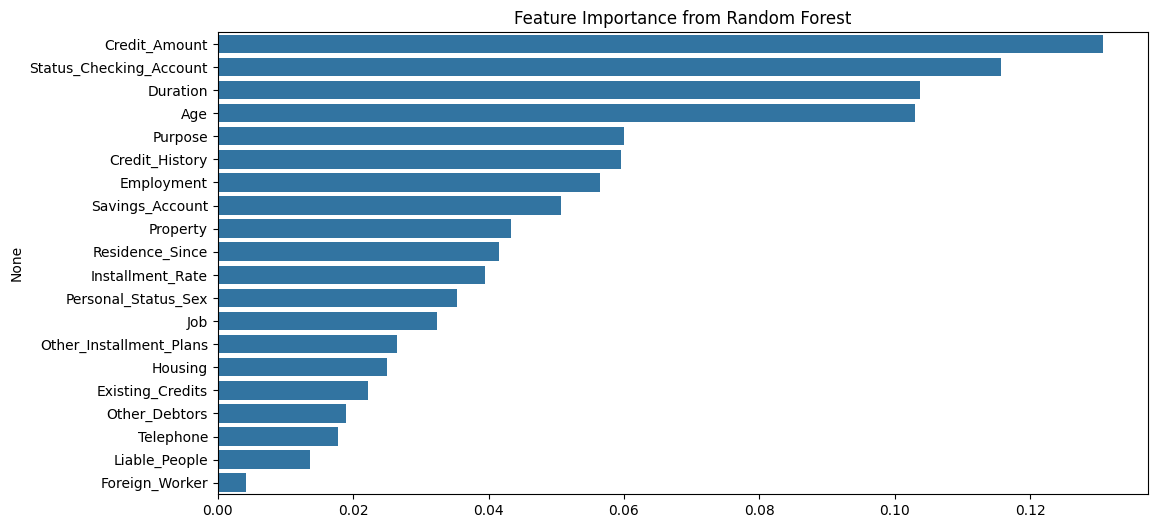

In [38]:
# Feature Importance using a RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X ,y)

feature_importances = pd.Series(model.feature_importances_ ,index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance from Random Forest')
plt.show()

# 4.Feature Engineering

# 5.Model Selection

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [40]:
X_train.shape ,X_test.shape

((1120, 61), (280, 61))

In [41]:
y_train.shape ,y_test.shape

((1120,), (280,))

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    # 'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

In [44]:
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    if roc_auc:
        print(f"ROC AUC Score: {roc_auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    # Store results
    results[model_name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}

Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.7429
ROC AUC Score: 0.8226
[[105  44]
 [ 28 103]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       149
           1       0.70      0.79      0.74       131

    accuracy                           0.74       280
   macro avg       0.75      0.75      0.74       280
weighted avg       0.75      0.74      0.74       280

--------------------------------------------------
Training Decision Tree...
Model: Decision Tree
Accuracy: 0.7821
ROC AUC Score: 0.7838
[[113  36]
 [ 25 106]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       149
           1       0.75      0.81      0.78       131

    accuracy                           0.78       280
   macro avg       0.78      0.78      0.78       280
weighted avg       0.78      0.78      0.78       280

--------------------------------------------------
Training Rando

Model: Random Forest
Accuracy: 0.8286
ROC AUC Score: 0.9245
[[126  23]
 [ 25 106]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       149
           1       0.82      0.81      0.82       131

    accuracy                           0.83       280
   macro avg       0.83      0.83      0.83       280
weighted avg       0.83      0.83      0.83       280

--------------------------------------------------
Training Gradient Boosting...
Model: Gradient Boosting
Accuracy: 0.8071
ROC AUC Score: 0.9090
[[120  29]
 [ 25 106]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       149
           1       0.79      0.81      0.80       131

    accuracy                           0.81       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.81      0.81      0.81       280

--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Numbe

In [45]:
results

{'Logistic Regression': {'Accuracy': 0.7428571428571429,
  'ROC AUC': np.float64(0.8226343562682514)},
 'Decision Tree': {'Accuracy': 0.7821428571428571,
  'ROC AUC': np.float64(0.783774783544239)},
 'Random Forest': {'Accuracy': 0.8285714285714286,
  'ROC AUC': np.float64(0.9245094523285005)},
 'Gradient Boosting': {'Accuracy': 0.8071428571428572,
  'ROC AUC': np.float64(0.9089605000256161)},
 'LightGBM': {'Accuracy': 0.8142857142857143,
  'ROC AUC': np.float64(0.9161329986167324)},
 'Support Vector Machine': {'Accuracy': 0.8464285714285714,
  'ROC AUC': np.float64(0.9136738562426353)}}

In [46]:
best_roc_model = max(results, key=lambda x: results[x]['ROC AUC'])
print(f"Best Model based on ROC AUC: {best_roc_model}")

Best Model based on ROC AUC: Random Forest


In [47]:
best_acc_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f"Best Model based on ROC AUC: {best_acc_model}")

Best Model based on ROC AUC: Support Vector Machine


In [48]:
X_train_scaled.shape ,X_test_scaled.shape

((1120, 61), (280, 61))

In [49]:
y_train.shape ,y_test.shape

((1120,), (280,))

In [50]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score, roc_curve, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight

In [51]:
kfold = StratifiedKFold(n_splits=10 ,shuffle=True ,random_state=42)

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model ,X_train_scaled ,y_train ,cv=kfold ,scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores)}")

Cross-Validation ROC-AUC Scores: [0.94178628 0.90334928 0.94401914 0.87607656 0.9430622  0.9245614
 0.9430622  0.92200957 0.88229665 0.9013074 ]
Mean ROC-AUC Score: 0.9181530683445626


In [52]:
class_weights = compute_class_weight('balanced' ,classes=np.unique(y_train) ,y=y_train)
class_weights_dict = { 0 : class_weights[0] ,1 : class_weights[1] }

model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: np.float64(1.0163339382940109),
                                     1: np.float64(0.984182776801406)},
                       random_state=42)

In [53]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

In [54]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [55]:
y_pred_proba

array([0.30817636, 0.86736904, 0.00741706, 0.05614728, 0.11845055,
       0.54285261, 0.62282493, 0.08492317, 0.01377734, 0.25635669,
       0.06841497, 0.77938615, 0.04153884, 0.81223879, 0.52080214,
       0.93584948, 0.02701867, 0.02933303, 0.13357714, 0.19107207,
       0.88077332, 0.17885615, 0.10465313, 0.19299329, 0.53307262,
       0.31410164, 0.49022734, 0.8587149 , 0.9396894 , 0.03882574,
       0.1972228 , 0.45814796, 0.0388981 , 0.00587933, 0.62451784,
       0.11258418, 0.07522452, 0.92867872, 0.91793426, 0.78245122,
       0.144375  , 0.82617601, 0.26612293, 0.85496747, 0.12137745,
       0.9543633 , 0.98855411, 0.0901295 , 0.96384401, 0.06765173,
       0.05202093, 0.38673087, 0.11735426, 0.93810618, 0.73614047,
       0.40782916, 0.14672082, 0.47278993, 0.41321301, 0.01431612,
       0.77029374, 0.2856748 , 0.07201854, 0.18272805, 0.25760152,
       0.64635566, 0.94015572, 0.55320762, 0.21196198, 0.70172057,
       0.96066614, 0.01891502, 0.09944905, 0.25812302, 0.26685

In [56]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[128  21]
 [ 23 108]]


In [57]:
# Classification Report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       149
           1       0.84      0.82      0.83       131

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280



In [58]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.93


In [59]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Precision Score: {precision_score(y_test, y_pred):.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.2f}")


F1 Score: 0.83
Precision Score: 0.84
Recall Score: 0.82


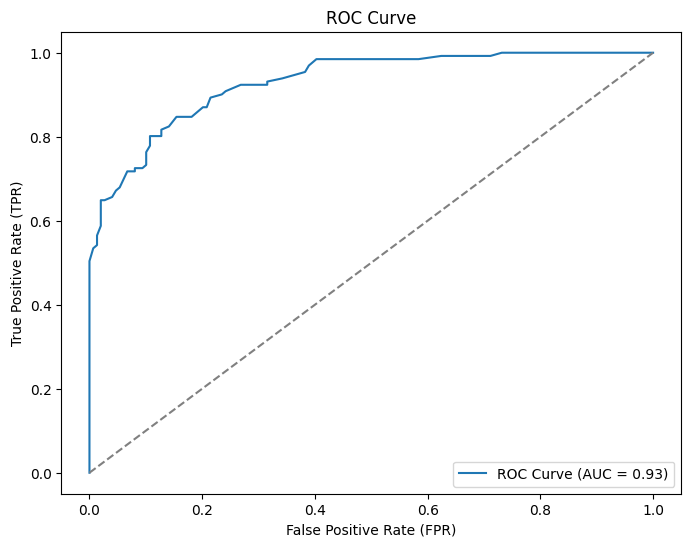

In [60]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


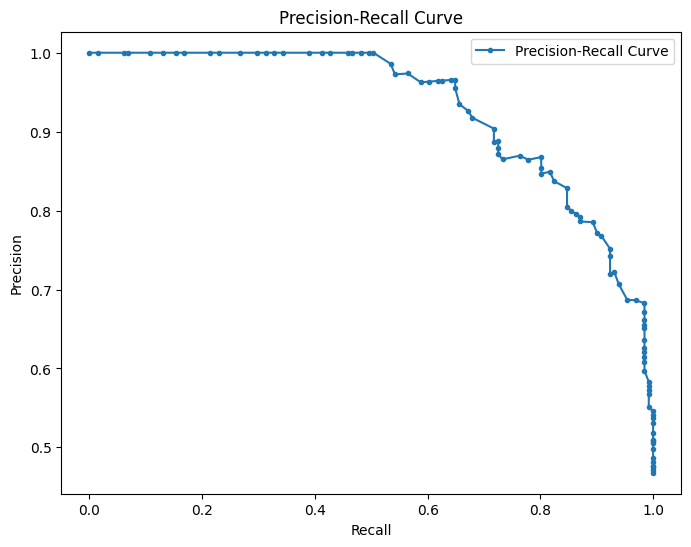

In [61]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [63]:
#Prediction Pipeline

new_data = pd.DataFrame({
    'Status_Checking_Account': ['A11'],
    'Duration': [12],
    'Credit_History': ['A34'],
    'Purpose': ['A43'],
    'Credit_Amount': [3000],
    'Savings_Account': ['A61'],
    'Employment': ['A73'],
    'Installment_Rate': [4],
    'Personal_Status_Sex': ['A92'],
    'Other_Debtors': ['A101'],
    'Residence_Since': [4],
    'Property': ['A124'],
    'Age': [32],
    'Other_Installment_Plans': ['A143'],
    'Housing': ['A152'],
    'Existing_Credits': [2],
    'Job': ['A173'],
    'Liable_People': [1],
    'Telephone': ['A192'],
    'Foreign_Worker': ['A201']
})

# Apply the preprocessing pipeline used during training
new_data_preprocessed = pipeline.transform(new_data)

# If required, scale the preprocessed data (if using standardized data for prediction)
new_data_scaled = scaler.transform(new_data_preprocessed)

# Predict using the best model (replace `best_model` with the actual model object)
predictions = model.predict(new_data_scaled)  # For labels
predictions_proba = model.predict_proba(new_data_scaled)[:, 1]  # For probabilities, if applicable

# Output predictions # 0:good 1:bad
print("Predicted Labels:", predictions)
print("Predicted Probabilities:", predictions_proba)


Predicted Labels: [1]
Predicted Probabilities: [0.64]


In [69]:
import pickle

folder = 'artifacts'

with open(f'../{folder}/pipeline.pkl' ,'wb') as f:
    pickle.dump(pipeline ,f)

with open(f'../{folder}/scaler.pkl' ,'wb') as f:
    pickle.dump(scaler ,f)
    
with open(f'../{folder}/model.pkl' ,'wb') as f:
    pickle.dump(model ,f)

In [70]:
folder = 'artifacts'

with open(f'../{folder}/pipeline.pkl' ,'rb') as f:
    pipeline = pickle.load(f)

with open(f'../{folder}/scaler.pkl' ,'rb') as f:
    scaler = pickle.load(f)
    
with open(f'../{folder}/model.pkl' ,'rb') as f:
    model = pickle.load(f)

In [71]:
#Prediction Pipeline

new_data = pd.DataFrame({
    'Status_Checking_Account': ['A11'],
    'Duration': [12],
    'Credit_History': ['A34'],
    'Purpose': ['A43'],
    'Credit_Amount': [3000],
    'Savings_Account': ['A61'],
    'Employment': ['A73'],
    'Installment_Rate': [4],
    'Personal_Status_Sex': ['A92'],
    'Other_Debtors': ['A101'],
    'Residence_Since': [4],
    'Property': ['A124'],
    'Age': [32],
    'Other_Installment_Plans': ['A143'],
    'Housing': ['A152'],
    'Existing_Credits': [2],
    'Job': ['A173'],
    'Liable_People': [1],
    'Telephone': ['A192'],
    'Foreign_Worker': ['A201']
})

# Apply the preprocessing pipeline used during training
new_data_preprocessed = pipeline.transform(new_data)

# If required, scale the preprocessed data (if using standardized data for prediction)
new_data_scaled = scaler.transform(new_data_preprocessed)

# Predict using the best model (replace `best_model` with the actual model object)
predictions = model.predict(new_data_scaled)  # For labels
predictions_proba = model.predict_proba(new_data_scaled)[:, 1]  # For probabilities, if applicable

# Output predictions # 0:good 1:bad
print("Predicted Labels:", predictions)
print("Predicted Probabilities:", predictions_proba)


Predicted Labels: [1]
Predicted Probabilities: [0.64]
